In [1]:
import pandas as pd

# Loading both the datasets
tabularcsvdata = '/kaggle/input/inputdataset/cleaned_train.csv'
actigraphydata = '/kaggle/input/inputdataset/CleanedActigraphyData.csv'

data_1 = pd.read_csv(tabularcsvdata)
data_2 = pd.read_csv(actigraphydata)


In [2]:
data_1.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,age_group,CGAS_Score,Physical-BMI,BIA_Activity_Level,Fitness_Combined_Score,Physical_Composite_Index,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,5,0,Child,51.000000,16.877316,2.0,0.200000,0.184805,64.4,3.0,2.0
1,000fd460,9,0,Early Teen,65.156829,14.035590,2.0,0.400000,0.178587,64.0,0.0,0.0
2,00105258,10,1,Early Teen,65.156829,19.131648,3.0,0.583126,0.193319,54.0,2.0,0.0
3,00115b9f,9,0,Early Teen,71.000000,18.292347,3.0,0.400000,0.190185,45.0,0.0,1.0
4,001f3379,13,1,Teen,50.000000,22.279952,2.0,0.400000,0.217322,56.0,0.0,1.0


In [3]:
data_1 = data_1.drop(columns=['age_group'])

In [4]:
data_2.head()

,participant_id,mean_enmo,std_enmo,max_enmo,min_enmo,mean_magnitude,std_magnitude,inactivity_percentage,non_wear_percentage,activity_level,sii
0,00115b9f,0.020411,0.001761,0.022853,0.018667,1.020398,0.001759,0.000000,0.000000,Medium,1.0
1,001f3379,0.013445,0.031016,2.952888,0.000000,0.996000,0.049507,3.763106,48.399446,Medium,1.0
2,00f332d1,0.029802,0.104216,3.681586,0.000000,0.980751,0.070811,15.596860,11.175805,Low,1.0
3,01085eb3,0.035465,0.085573,2.506849,0.000000,0.969044,0.082127,4.349319,0.000000,Low,0.0
4,012cadd8,0.061621,0.202441,6.307294,0.000000,0.966942,0.135903,8.530412,0.000000,Low,0.0


In [5]:
data_2 = data_2.drop(columns=['activity_level','sii'])

In [6]:
# Merge the dataframes based on 'participant_id' in data_1 and 'id' in data_2
merged_data = pd.merge(data_1, data_2, left_on='id', right_on='participant_id', how='inner')
nan_check = merged_data.isnull().sum()
nan_check

id                                        0
Basic_Demos-Age                           0
Basic_Demos-Sex                           0
CGAS_Score                                0
Physical-BMI                              0
BIA_Activity_Level                        0
Fitness_Combined_Score                    0
Physical_Composite_Index                  0
SDS-SDS_Total_T                           0
PreInt_EduHx-computerinternet_hoursday    0
sii                                       0
participant_id                            0
mean_enmo                                 0
std_enmo                                  2
max_enmo                                  0
min_enmo                                  0
mean_magnitude                            0
std_magnitude                             2
inactivity_percentage                     0
non_wear_percentage                       0
dtype: int64

In [7]:
merged_data = merged_data.dropna()

In [8]:
nan_check = merged_data.isnull().sum()
nan_check

id                                        0
Basic_Demos-Age                           0
Basic_Demos-Sex                           0
CGAS_Score                                0
Physical-BMI                              0
BIA_Activity_Level                        0
Fitness_Combined_Score                    0
Physical_Composite_Index                  0
SDS-SDS_Total_T                           0
PreInt_EduHx-computerinternet_hoursday    0
sii                                       0
participant_id                            0
mean_enmo                                 0
std_enmo                                  0
max_enmo                                  0
min_enmo                                  0
mean_magnitude                            0
std_magnitude                             0
inactivity_percentage                     0
non_wear_percentage                       0
dtype: int64

In [9]:
# Saving the merged data to a new CSV file
merged_data_path = '/kaggle/working/merged_dataset.csv'
merged_data.to_csv(merged_data_path, index=False)

In [10]:
merged_data.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS_Score,Physical-BMI,BIA_Activity_Level,Fitness_Combined_Score,Physical_Composite_Index,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,participant_id,mean_enmo,std_enmo,max_enmo,min_enmo,mean_magnitude,std_magnitude,inactivity_percentage,non_wear_percentage
0,00115b9f,9,0,71.0,18.292347,3.0,0.400000,0.190185,45.0,0.0,1.0,00115b9f,0.020411,0.001761,0.022853,0.018667,1.020398,0.001759,0.000000,0.000000
1,001f3379,13,1,50.0,22.279952,2.0,0.400000,0.217322,56.0,0.0,1.0,001f3379,0.013445,0.031016,2.952888,0.000000,0.996000,0.049507,3.763106,48.399446
2,00f332d1,14,0,68.0,17.168636,4.0,0.400000,0.192240,43.0,2.0,1.0,00f332d1,0.029802,0.104216,3.681586,0.000000,0.980751,0.070811,15.596860,11.175805
3,01085eb3,12,0,58.0,34.187282,1.0,0.200000,0.227412,73.0,0.0,0.0,01085eb3,0.035465,0.085573,2.506849,0.000000,0.969044,0.082127,4.349319,0.000000
4,012cadd8,9,0,60.0,17.089151,2.0,0.583126,0.193319,40.0,0.0,0.0,012cadd8,0.061621,0.202441,6.307294,0.000000,0.966942,0.135903,8.530412,0.000000


In [11]:
!ls /kaggle/input/actigraphy-data-model-development

__notebook__.ipynb
__output__.json
__results__.html
__results___files
actigraphydatapredictions.csv
actigraphydatapredictions_with_probabilities.csv
actigraphytest_data.csv
custom.css
svm_actigraphydata_model.pkl
svm_actigraphydata_pca.pkl
svm_actigraphydata_scaler.pkl
svm_actigraphydata_selected_features.pkl


In [12]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix

path_to_scaler_1="/kaggle/input/svm-model-implementation/svm_tabulardata_scaler.pkl"
scaler_1 = joblib.load(path_to_scaler_1)

In [13]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix

# Paths to the saved components for both models, loaded from the respective notebooks
path_to_scaler_1, path_to_pca_1, path_to_svm_model_1, path_to_selected_features_1 = "/kaggle/input/svm-model-implementation/svm_tabulardata_scaler.pkl", "/kaggle/input/svm-model-implementation/svm_tabulardata_pca.pkl", "/kaggle/input/svm-model-implementation/svm_tabulardata_model.pkl", "/kaggle/input/svm-model-implementation/svm_tabulardata_selected_features.pkl"
path_to_scaler_2, path_to_pca_2, path_to_svm_model_2, path_to_selected_features_2 = "/kaggle/input/actigraphy-data-model-development/svm_actigraphydata_scaler.pkl", "/kaggle/input/actigraphy-data-model-development/svm_actigraphydata_pca.pkl", "/kaggle/input/actigraphy-data-model-development/svm_actigraphydata_model.pkl", "/kaggle/input/actigraphy-data-model-development/svm_actigraphydata_selected_features.pkl"

# Load saved components
scaler_1 = joblib.load(path_to_scaler_1)
pca_1 = joblib.load(path_to_pca_1)
svm_model_1 = joblib.load(path_to_svm_model_1)
selected_features_1 = joblib.load(path_to_selected_features_1)

scaler_2 = joblib.load(path_to_scaler_2)
pca_2 = joblib.load(path_to_pca_2)
svm_model_2 = joblib.load(path_to_svm_model_2)
selected_features_2 = joblib.load(path_to_selected_features_2)

# Load the new dataset
new_data_path = "/kaggle/working/merged_dataset.csv"
new_dataset = pd.read_csv(new_data_path)

# Divide into features and target
X = new_dataset.drop(columns=["sii"])
y = new_dataset["sii"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess and generate predictions for each SVM model
def preprocess_and_predict(X_data, scaler, pca, selected_features, model):
    X_selected = X_data[selected_features]
    X_scaled = scaler.transform(X_selected)
    X_pca = pca.transform(X_scaled)
    predictions = model.predict(X_pca)
    proba = model.predict_proba(X_pca)
    return predictions, proba

# Predictions from model 1
pred_1_train, proba_1_train = preprocess_and_predict(X_train, scaler_1, pca_1, selected_features_1, svm_model_1)
pred_1_test, proba_1_test = preprocess_and_predict(X_test, scaler_1, pca_1, selected_features_1, svm_model_1)

# Predictions from model 2
pred_2_train, proba_2_train = preprocess_and_predict(X_train, scaler_2, pca_2, selected_features_2, svm_model_2)
pred_2_test, proba_2_test = preprocess_and_predict(X_test, scaler_2, pca_2, selected_features_2, svm_model_2)

# Combine predictions as features for the ensemble model
X_ensemble_train = np.column_stack((pred_1_train, pred_2_train))
X_ensemble_test = np.column_stack((pred_1_test, pred_2_test))

# Train the ensemble model (Logistic Regression)
ensemble_model = LogisticRegression(random_state=42)
ensemble_model.fit(X_ensemble_train, y_train)

# Predictions using ensemble model
y_pred_ensemble = ensemble_model.predict(X_ensemble_test)
y_pred_proba_ensemble = ensemble_model.predict_proba(X_ensemble_test)  # Probability for positive class

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_ensemble))



Ensemble Model Accuracy: 0.5919732441471572
Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.98      0.74       173
         1.0       0.50      0.02      0.04        86
         2.0       0.45      0.14      0.21        37
         3.0       0.00      0.00      0.00         3

    accuracy                           0.59       299
   macro avg       0.39      0.29      0.25       299
weighted avg       0.55      0.59      0.47       299



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
unique_values = np.unique(y_pred_ensemble)
unique_values

array([0., 1., 2.])

In [15]:
y_pred_proba_ensemble.shape

(299, 4)

In [16]:
X_ensemble_test.shape

(299, 2)

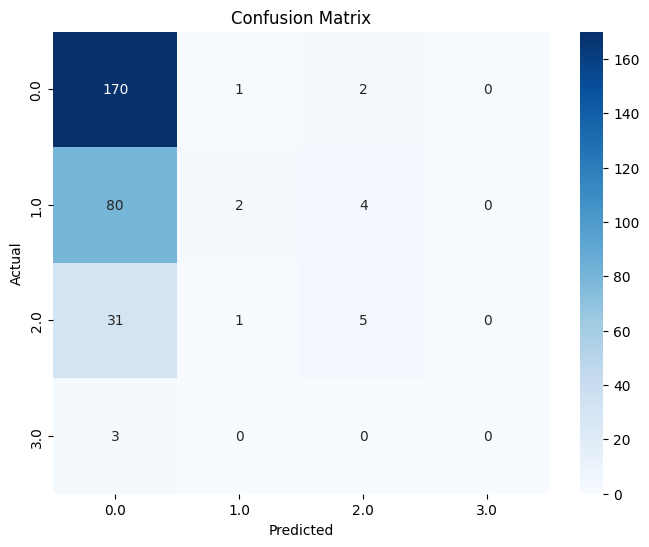

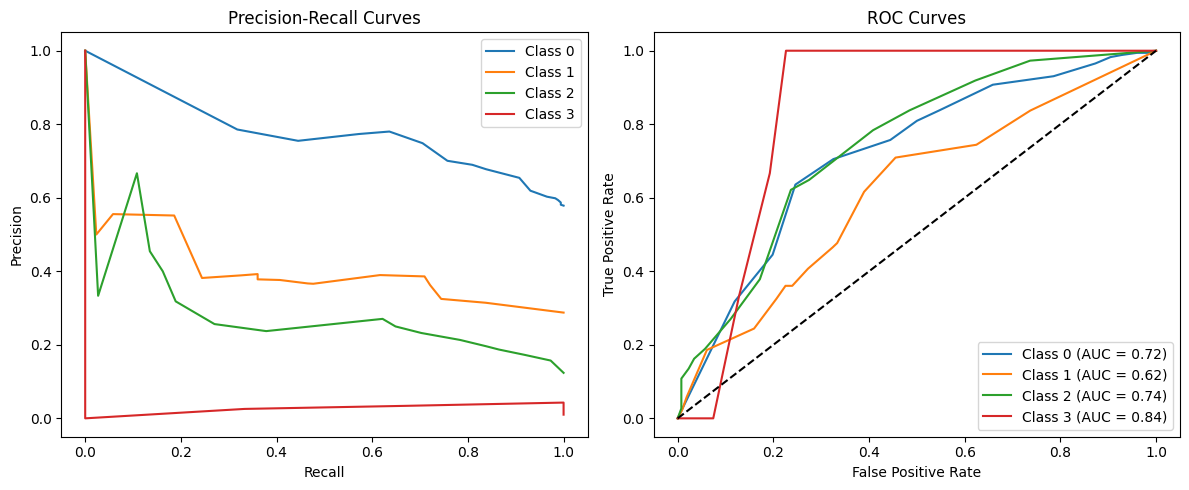

Ensemble Model Accuracy: 0.5919732441471572
Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.98      0.74       173
         1.0       0.50      0.02      0.04        86
         2.0       0.45      0.14      0.21        37
         3.0       0.00      0.00      0.00         3

    accuracy                           0.59       299
   macro avg       0.39      0.29      0.25       299
weighted avg       0.55      0.59      0.47       299



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precision-Recall Curves and ROC Curves for each class
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

plt.figure(figsize=(12, 5))

# Precision-Recall Curves
plt.subplot(121)
for i, class_label in enumerate([0, 1, 2, 3]):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba_ensemble[:, i])
    plt.plot(recall, precision, label=f"Class {class_label}")
plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

# ROC Curves
plt.subplot(122)
for i, class_label in enumerate([0, 1, 2, 3]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba_ensemble[:, i])
    roc_auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba_ensemble[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation Metrics: Accuracy, Classification Report
accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_ensemble))
